## Evacuation ReTSVI

#%ls LifeToll_DissertationTemplate/ 
## Task
- Update distance to safe area (maybe look for a transportation model)
- Include survey data into the Movilization curve
- Combine SOVI 
- Estimate how much the vulnerability change the number of people killed in the inundation
- Estimate the changes in  the number of people killed in the inundation by delaying the alarm release.

### Combining movilization curve and alarm penetration

In [3]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

61 sasa
61 tata


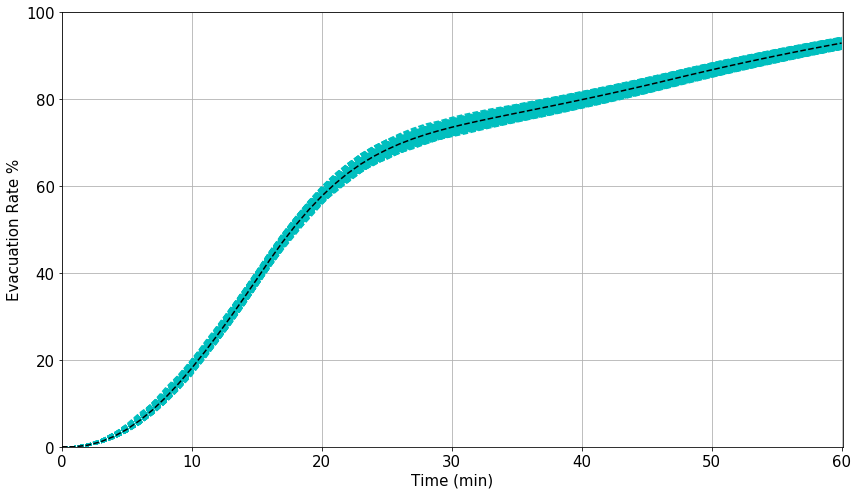

In [20]:
 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

#Mov = scipy.io.loadmat('LifeToll_DissertationTemplate/Input/Movilization.mat')
#Mov= Mov['Movilization']

#Pen= scipy.io.loadmat('LifeToll_DissertationTemplate/Input/Difussion_penetration.mat')
#Pen = Pen['Difussion_penetration']

Pen=pd.read_csv("RECSIMpenetration.csv")
Mov=pd.read_csv("FIAMobilization.csv")



#print movis
samples=1000

#variables Movilization
time_mov=Mov['Min'].tolist()
mov_upper=Mov['Upper'].tolist()
mov_aver=Mov['Average'].tolist()
mov_lower=Mov['Lower'].tolist()

#Variable Diffusion_penetration
time_pen=Pen['Min'].tolist()
pen_upper=Pen['Upper'].tolist()
pen_aver=Pen['Average'].tolist()
pen_lower=Pen['Lower'].tolist()




N=samples #% numbers of montecarlo samples
sasa=len(pen_lower);
tata=len(mov_lower);

print sasa, 'sasa'
print tata, 'tata'
Movilizados=np.zeros([sasa+tata,N])

Mov_rate   =np.zeros(tata)
penet_rate =np.zeros(sasa);

for samples in range(N):
        
    penet_rate [0]=0;
    for t1 in range(1,sasa):
        if N==1:
            r1=0.5
        else:
            r1=np.random.rand()
               

        a=pen_lower[t1]
        b=pen_upper[t1]
        c=pen_aver[t1]

        if r1<=(c-a)**2/((b-a)*(c-a)):
            penet_rate [t1] = (r1*(b-a)*(c-a))**0.5+a
        else: 
            penet_rate [t1] = b-((1-r1)*(b-a)*(b-c))**0.5
            
        #if penet_rate [t1]>1:
        #print (penet_rate [t1]) 
            
        Mov_rate [0]=0;
        for t2 in range(1,tata):
#                 if N==1
#                     r1=0.5;
#                 else
#                     r1=rand();
#                 end   

            a=mov_lower[t2]
            b=mov_upper[t2]
            c=mov_aver[t2]
            
            '''print t1, t2
            print 'LLL'
            print '(c-a)=',(c-a)
            print '(b-a)=',(b-a)
            print 'c=',c
            print 'b=',b
            print 'a=',a'''
            if r1<=(c-a)**2/((b-a)*(c-a)):
                Mov_rate [t2] = (r1*(b-a)*(c-a))**0.5+a
            else: 
                Mov_rate [t2] = b-((1-r1)*(b-a)*(b-c))**0.5
            
            

            Movilizados[t1+t2,samples]=(penet_rate[t1]-penet_rate[t1-1])*(Mov_rate[t2]-Mov_rate[t2-1])+Movilizados[t1+t2,samples]
            
            
            
                                                    ##agrego Movilizados(t1+t2,N) asi no me olvido de los evacuados en el paso anterior
            
    
'''fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,figsize=(10,10),sharex=True)
#plt.figure(figsize=(50,40))


ax0.plot(Mov['Lower']*100,'--c',Mov['Average']*100,'--k',Mov['Upper']*100,'--c')
ax1.plot(Pen['Lower']*100,'--c',Pen['Average']*100,'--k',Pen['Upper']*100,'--c')
print Movilizados.shape

for aleato in range(samples):    
    ax2.plot(np.cumsum((Movilizados)[:,aleato])[0:61]*100,'--c')
    
ax2.plot(np.cumsum(np.mean(Movilizados,axis=1))[0:61]*100,'--k')

'''
#ax0.set_xticklabels([0,10,20,30,40,50,60],fontsize = 15)
#ax1.set_xticklabels([0,10,20,30,40,50,60], fontsize = 15)
#ax2.set_xticklabels([0,10,20,30,40,50,60], fontsize = 15)
'''

ax2.set_xlabel('Time (min)',font)
ax0.set_ylabel('Movilization %',font)
ax1.set_ylabel('Alarm Penetration %',font)
ax2.set_ylabel('Evacuation Rate %',font)
ax0.set_xlim([0,61])
ax1.set_xlim([0,61])
ax2.set_xlim([0,61])

ax0.set_ylim([0,102])
ax1.set_ylim([0,102])
ax2.set_ylim([0,102])



ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

#ax0.ylabel('Movilization %',font)
#plt.title('Histogram of IQ')
# Tweak spacing between subplots to prevent labels from overlapping
#plt.subplots_adjust(hspace=0.5)
plt.savefig('../RiskAnalysisPeru_alvaro/PaperDraft/FiguresPaper/CombiningFIA.tif', dpi = 300)
plt.show()
'''
fig, (ax2) = plt.subplots(nrows=1,figsize=(14,8),sharex=True)
#plt.figure(figsize=(50,40))


#ax0.plot(Mov['Lower']*100,'--c',Mov['Average']*100,'--k',Mov['Upper']*100,'--c')
#ax1.plot(Pen['Lower']*100,'--c',Pen['Average']*100,'--k',Pen['Upper']*100,'--c')
#print Movilizados.shape

for aleato in range(samples):    
    ax2.plot(np.cumsum((Movilizados)[:,aleato])[0:61]*100,'--c')
    
ax2.plot(np.cumsum(np.mean(Movilizados,axis=1))[0:61]*100,'--k')

'''
#ax0.set_xticklabels([0,10,20,30,40,50,60],fontsize = 15)
#ax1.set_xticklabels([0,10,20,30,40,50,60], fontsize = 15)
#ax2.set_xticklabels([0,10,20,30,40,50,60], fontsize = 15)
'''

ax2.set_xlabel('Time (min)',font)
#ax0.set_ylabel('Movilization %',font)
#ax1.set_ylabel('Alarm Penetration %',font)
ax2.set_ylabel('Evacuation Rate %',font)
#ax0.set_xlim([0,61])
#ax1.set_xlim([0,61])
ax2.set_xlim([0,60.1])

#ax0.set_ylim([0,102])
#ax1.set_ylim([0,102])
ax2.set_ylim([0,100.1])

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

#ax0.grid(True)
#ax1.grid(True)
ax2.grid(True)

#ax0.ylabel('Movilization %',font)
#plt.title('Histogram of IQ')
# Tweak spacing between subplots to prevent labels from overlapping
#plt.subplots_adjust(hspace=0.5)
plt.savefig('../RiskAnalysisPeru_alvaro/PaperDraft/FiguresPaper/CombiningFIA.pdf', dpi = 600)
plt.show()


In [ ]:
#print len(Movilizados[:,0])
#print Movilizados

## Run in case we are using Survey data

In [12]:
movilizados=pd.read_csv('MobilizationSurveySummary.csv')
#print movilizados
MOvilizados=np.array(movilizados['% Mobilized Low Vulnerability'].tolist())
MOvilizadoss=np.zeros([MOvilizados.shape[0],1000])
for i in range(MOvilizadoss.shape[1]):
    MOvilizadoss[:,i]=MOvilizados
print (MOvilizadoss[:,501])
print (MOvilizadoss[:,501])
print (MOvilizadoss.shape)
Movilizados=MOvilizadoss
N=MOvilizadoss.shape[1]
print (N)

[0.068  0.068  0.068  0.068  0.068  0.0165 0.0165 0.0165 0.0165 0.0165
 0.0165 0.0165 0.0165 0.0165 0.0165 0.013  0.013  0.014  0.013  0.013
 0.013  0.013  0.014  0.013  0.013  0.013  0.013  0.014  0.013  0.013
 0.006  0.007  0.006  0.007  0.006  0.006  0.007  0.006  0.007  0.006
 0.006  0.007  0.006  0.007  0.006  0.006  0.006  0.006  0.006  0.006
 0.006  0.006  0.007  0.006  0.006  0.006  0.006  0.006  0.006  0.006
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
 0.001  0.001  0.00

In [7]:
import pandas as pd
#%ls
Data=pd.read_csv('LifeToll_Tresvi/01Scenario_IntersectData_Inundation_SOVI_MaterialTravTime3hours.csv')
#print Data.head()

In [13]:
#load ('Input\data.mat','data')

import datetime
def calculoEvacuados(extra):
    
    walk_upper =187 #velocidad de evacuacion m/min
    walk_aver=107
    walk_lower=80
    #%variables Data
    #    % n_people=data(:,1);
    #    % depth_exp=data(:,2);
    #    % depth_low=data(:,3);
    #    % depth_upp=data(:,4);
    #    % vel_exp=data(:,5);
    #    % vel_low=data(:,6);
    #    % vel_upp=data(:,7);
    
    arrival_time_upper= Data['Time']*60 # it was in hours now it is in minutes
    arrival_time_aver=  Data['Time']*60
    arrival_time_lower= Data['Time']*60



    #    % fractionConcr_Houses=data(:,11);
    #    % fractionAncHouses=data(:,12);
    #    % fractionNoAnc_houses=data(:,13);
    
    Distance_max                    =Data['Distance_to_Safe_Zone_Max__m_'] 
    Distance_min                    =Data['Distance_to_Safe_Zone_Min__m_']
    tama                            =[len(arrival_time_lower),len(Movilizados[:,0])]


    #% arrival_time                    =zeros (length(arrival_time_lower),N);
    SafeZoneTime                    =np.zeros([len(arrival_time_lower),1])
    File                            =np.zeros([len(arrival_time_lower),len(Movilizados[:,0]),2,1]);
    random_test                     =np.zeros([len(arrival_time_lower),N])
    #% Rate_toSafe_and_time_sample     =zeros (length(arrival_time_lower),length(Movilizados(:,1)),2,N);
    arrival_timeII                  =np.zeros([len(arrival_time_lower),1])
    rate_evacuated                  =np.zeros([tama[0],N])# %%preallocating memory
    rate_evacuatedII                =np.zeros([tama[0],1])
    print ('vamos bien')


    for sample in range(N): 
   
        # sample;
        time1=datetime.datetime.now()
        #r1=rand();
        for cell in range(len(arrival_time_lower)):
            if N==1:
                r1=0.5 
                r2=0.5
                r3=0.5
            else:
                r1=np.random.rand()
                r2=np.random.rand()
                r3=np.random.rand()
               
               #random_test(cell,sample)=r1;%pare verificar que el programa esta cmabiando los valores de numero aleatoreo
            if arrival_time_upper[cell]==0:
                arrival_time_upper[cell]=6*60
           
            if arrival_time_lower [cell]==0:
                arrival_time_lower[cell]=6*60

            if arrival_time_aver[cell]==0:
               arrival_time_aver[cell]=6*60
            a=arrival_time_upper[cell] #%%%needed to change because it is inversely proportional
            b=arrival_time_lower[cell]
            c=arrival_time_aver[cell]
            
            
            if a==0:
                a=c
            
            if c==0:
                c=b
                a=b
            
            

            if r1<=(c-a)**2/((b-a)*(c-a)):
                arrival_timeII[cell,0] = ((1-r1)*(b-a)*(c-a))**0.5+a
            else:
                arrival_timeII[cell,0] = b-((1-(1-r1))*(b-a)*(b-c))**0.5 #%%I replace r1 for 1-r1 because I change the a b c for arrival time
            
            
            a=walk_lower
            b=walk_upper
            c=walk_aver

            if r2<=(c-a)**2/((b-a)*(c-a)):
                walk_velocity  = (r2*(b-a)*(c-a))**0.5+a
            else :
                walk_velocity  = b-((1-r2)*(b-a)*(b-c))**0.5

            
            
            ##time to get to safety    
            SafeZoneTime[cell,0]=(r3*(float(Distance_max[cell])-float(Distance_min[cell]))+float(Distance_min[cell]))/walk_velocity 
            
            
            File= SafeZoneTime[cell,0]+np.array(range(len(Movilizados[:,sample]))) 
            CumMovil= np.cumsum(Movilizados[:,sample])
                #Dimension are [Cell Time %evacuados Sample]
            


  

        #%%%add time so we see what happen if the alarm is given later
        
   
        for cell in range(tama[0]):

            rate_evacuatedII[cell,0]=0
            for time in range(tama[1]):
                #print arrival_timeII[cell,0]
                #print File[time]+extra
                if (arrival_timeII[cell,0]-(File[time]+extra))<=0: 
                    #and rate_evacuatedII[cell,0]==0: # %%here is added the word Sample
                    rate_evacuatedII[cell,0]=CumMovil[time] #;%%here is added the word Sample

                    break
                #rate_evacuatedII[cell,0]==0:

                rate_evacuatedII[cell,0]=CumMovil[time]
                #print rate_evacuatedII[cell,0]
    
 
    #          Rate_toSafe_and_time_sample(:,:,:,sample)=file(:,:,:,1);
    #          arrival_time (:,sample)                  =arrival_timeII (:,1);
        rate_evacuated[:,sample]=rate_evacuatedII[:,0]
     
    
    
    time2=datetime.datetime.now()
    #print ('El tiempo es %d para N= %d',time2-time1,sample) 
    
    Evacuado=pd.DataFrame(index=Data['ID_Cens_F2D']) #range(len(np.mean(rate_evacuated,axis=1)*100)))
    #Evacuado['ID_Flo2D']=Data['ID_Flo2D']
    Evacuado['%Evacuado'+str(extra)+'min']=np.mean(rate_evacuated,axis=1)*100
    Evacuado.to_csv('Evacuado'+str(extra)+'minutos.csv')

In [14]:
for extra in [0,20,40,60,70,80,90,100,120]:
    calculoEvacuados(extra)
    

vamos bien


C:\Users\msomos\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in double_scalars


vamos bien
vamos bien
vamos bien
vamos bien
vamos bien
vamos bien
vamos bien
vamos bien


In [ ]:
Evacuado=pd.DataFrame(index=Data['ID_Flo2D']) #range(len(np.mean(rate_evacuated,axis=1)*100)))
#Evacuado['ID_Flo2D']=Data['ID_Flo2D']
Evacuado['%Evacuado'+str(extra)+'min']=np.mean(rate_evacuated,axis=1)*100
Evacuado.to_csv('Evacuado'+str(extra)+'min.csv')

In [ ]:
plt.plot(np.mean(rate_evacuated,axis=1)*100,'*')
plt.show()

In [ ]:
from IPython.display import Image
Image(filename='firstEvac.png')